### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-14/12/19
#### Clasificacion de RAW de MI-EEG con Conv-LSTM-2D
##### 10 ejecuciones independientes para obtener la media y desviacion estandar
##### Se agrego la transpuesta

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA09E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 5D
x_train = x_train.reshape((n_samples_train, 1, 1, 22, 1000))
x_test = x_test.reshape((n_samples_test, 1, 1, 22, 1000))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 22, 1000)
(288, 1, 1, 22, 1000)


In [0]:
x_train = np.transpose(x_train, (0,1,2,4,3))
x_test = np.transpose(x_test, (0,1,2,4,3))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 1000, 22)
(288, 1, 1, 1000, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 519us/sample - loss: 4.8476 - acc: 0.4653
kappa:  0.2870370370370371
confusion matrix:
 [[43  9 11  9]
 [ 7 20 16 29]
 [ 5 13 29 25]
 [ 2 13 15 42]]
(0.4816182581934991, 0.4652777777777778, 0.4654494933421932, None)


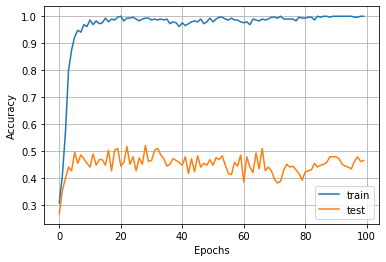

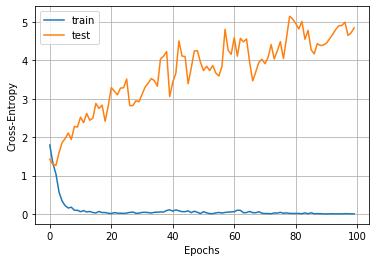

Iteration: 2
288/288 [==============================] - 0s 495us/sample - loss: 6.3195 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[27 21 21  3]
 [ 3 22 21 26]
 [ 0 14 34 24]
 [ 0 11 14 47]]
(0.517826797385621, 0.45138888888888884, 0.4524905483295817, None)


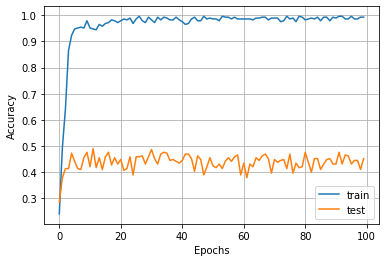

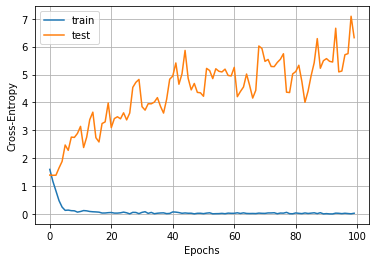

Iteration: 3
288/288 [==============================] - 0s 487us/sample - loss: 4.9599 - acc: 0.4583
kappa:  0.2777777777777778
confusion matrix:
 [[40  9 13 10]
 [ 5  7 25 35]
 [ 3 10 30 29]
 [ 1  3 13 55]]
(0.4636082001186824, 0.4583333333333333, 0.43479785762916623, None)


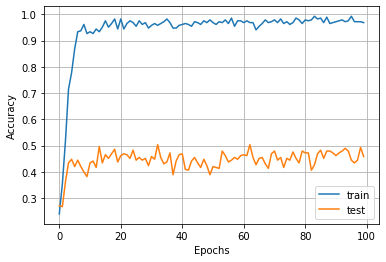

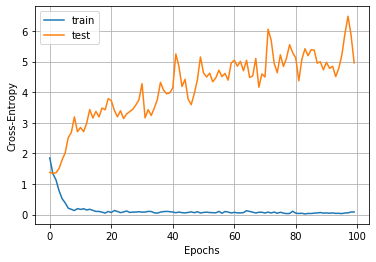

Iteration: 4
288/288 [==============================] - 0s 529us/sample - loss: 3.8819 - acc: 0.4722
kappa:  0.2962962962962963
confusion matrix:
 [[43 21  5  3]
 [ 9 40  4 19]
 [ 7 31 17 17]
 [ 1 29  6 36]]
(0.5146237947658402, 0.4722222222222222, 0.47068547970657515, None)


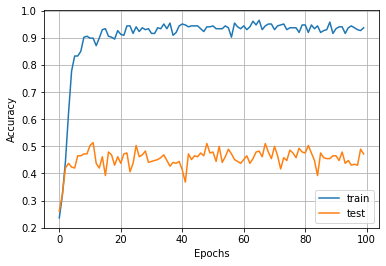

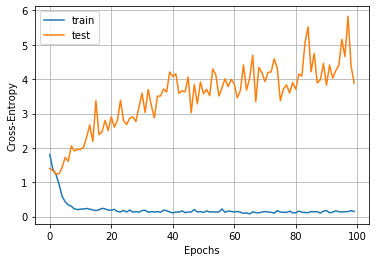

Iteration: 5
288/288 [==============================] - 0s 498us/sample - loss: 6.0713 - acc: 0.4722
kappa:  0.2962962962962963
confusion matrix:
 [[45  9 11  7]
 [10 14 15 33]
 [ 4 13 28 27]
 [ 3  6 14 49]]
(0.47332957098300943, 0.4722222222222222, 0.45963310546929403, None)


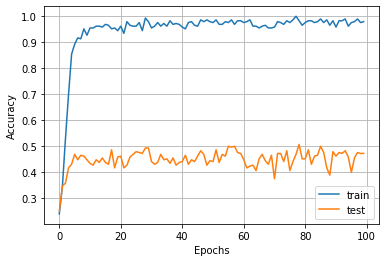

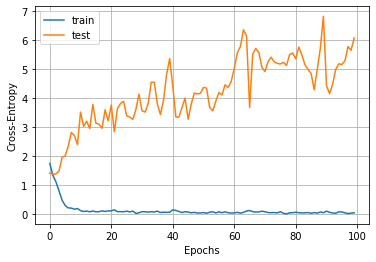

Iteration: 6
288/288 [==============================] - 0s 498us/sample - loss: 4.2178 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[40  8 20  4]
 [ 9  9 29 25]
 [ 6  7 37 22]
 [ 1  1 26 44]]
(0.4669501879699248, 0.4513888888888889, 0.4349217577842969, None)


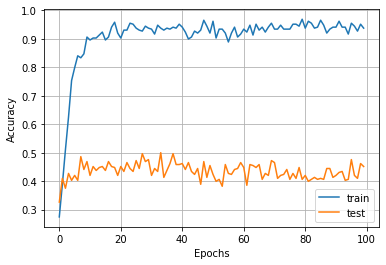

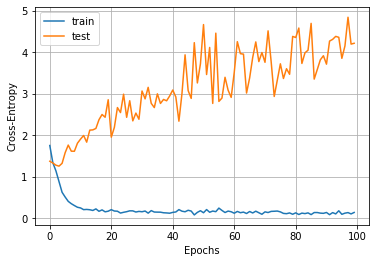

Iteration: 7
288/288 [==============================] - 0s 477us/sample - loss: 6.5205 - acc: 0.4062
kappa:  0.20833333333333337
confusion matrix:
 [[33 18  8 13]
 [13 17 12 30]
 [ 6  6 21 39]
 [ 4 16  6 46]]
(0.423428709739775, 0.40625, 0.3980330169858641, None)


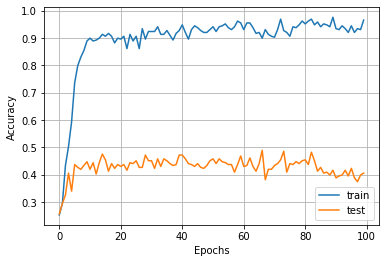

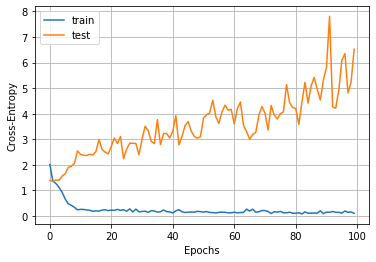

Iteration: 8
288/288 [==============================] - 0s 512us/sample - loss: 4.2637 - acc: 0.4653
kappa:  0.2870370370370371
confusion matrix:
 [[44 12 12  4]
 [ 7 22 23 20]
 [ 5 15 35 17]
 [ 1 15 23 33]]
(0.4844924641322137, 0.4652777777777778, 0.4704992932908343, None)


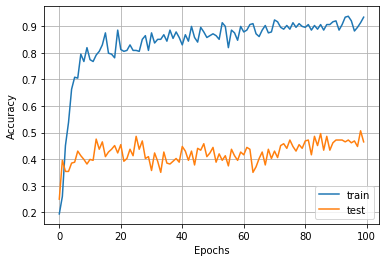

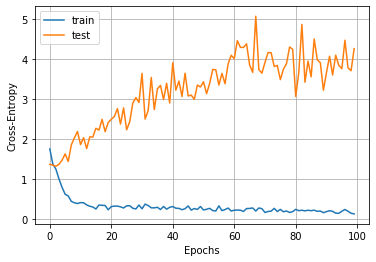

Iteration: 9
288/288 [==============================] - 0s 544us/sample - loss: 4.8954 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[52 11  6  3]
 [19 17  9 27]
 [12 13 23 24]
 [ 4 15 15 38]]
(0.43706958010213226, 0.45138888888888884, 0.43778192111520176, None)


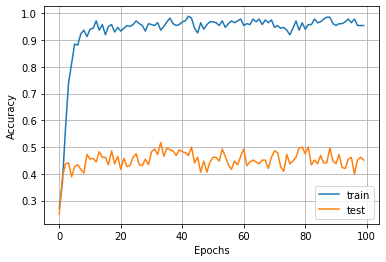

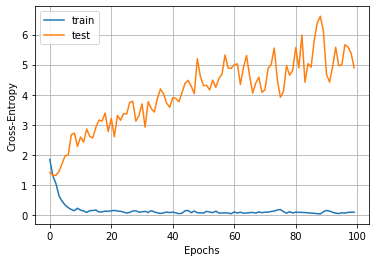

Iteration: 10
288/288 [==============================] - 0s 524us/sample - loss: 5.7644 - acc: 0.4062
kappa:  0.20833333333333337
confusion matrix:
 [[28 27 10  7]
 [ 7 15 17 33]
 [ 4  8 21 39]
 [ 1  7 11 53]]
(0.430151312410456, 0.40625, 0.3931941674237598, None)


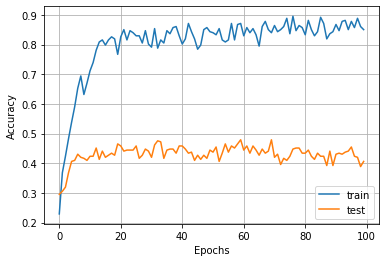

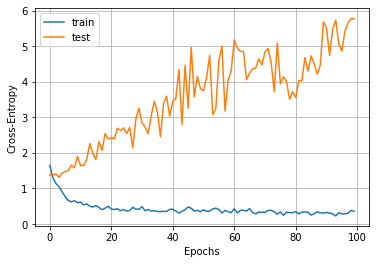


Resultados:
loss: [4.8476499451531305, 6.31954288482666, 4.9598505232069225, 3.8818888664245605, 6.071345488230388, 4.217802710003323, 6.520506381988525, 4.263729678259955, 4.895366218354967, 5.764354017045763]
accuracy: [0.4652778, 0.4513889, 0.45833334, 0.4722222, 0.4722222, 0.4513889, 0.40625, 0.4652778, 0.4513889, 0.40625]
kappa: [0.2870370370370371, 0.2685185185185185, 0.2777777777777778, 0.2962962962962963, 0.2962962962962963, 0.2685185185185185, 0.20833333333333337, 0.2870370370370371, 0.2685185185185185, 0.20833333333333337]
precision: [0.4816182581934991, 0.517826797385621, 0.4636082001186824, 0.5146237947658402, 0.47332957098300943, 0.4669501879699248, 0.423428709739775, 0.4844924641322137, 0.43706958010213226, 0.430151312410456]
recall: [0.4652777777777778, 0.45138888888888884, 0.4583333333333333, 0.4722222222222222, 0.4722222222222222, 0.4513888888888889, 0.40625, 0.4652777777777778, 0.45138888888888884, 0.40625]
f1: [0.4654494933421932, 0.4524905483295817, 0.4347978576291

In [0]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(ConvLSTM2D(128, (1,7), activation='relu', input_shape=(1,1,1000,22)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_9 (ConvLSTM2D)  (None, 1, 994, 128)       538112    
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 994, 128)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 127232)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8142912   
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 260       
Total params: 8,681,284
Trainable params: 8,681,284
Non-trainable params: 0
____________________________________________

In [0]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4500
std: (+/- 0.0231)
kappa: 0.2667
std: 0.0309
precision: 0.4693
recall: 0.4500
f1: 0.4417
